In [4]:
# import libraries for the demo
import wrd_client
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates
import pandas as pd
import numpy as np

In [5]:
# instantiate WRD client with provied url and login
client = wrd_client.WRDClient(wrdUrl='', username="", password="")

In [6]:
# Get location list data
locationData = client.get_locations()
data = pd.DataFrame(locationData)
print(data)

                                          Description  Latitude  Longtitude  \
0                                 AdC-0.1 Aird Ck Low   61.4610    -139.521   
1                                AdC-0.8 Aird Ck High   61.4671    -139.525   
2                                       Adit-0.7 Adit   61.4659    -139.524   
3                       AhC-0.1 Arch Ck Low at Donjek   61.4925    -139.725   
4                       AhC-0.4 Arch Ck Low at Donjek   61.4897    -139.657   
5                   AhC-3.9 Arch Ck Low end of Placer   61.4943    -139.671   
6                                 AhC-4.9 Arch Ck Low   61.4927    -139.725   
7                                AhC-7.6 Arch Ck High   61.4809    -139.618   
8                                     Blind Duplicate       NaN         NaN   
9                      DR-195.3 Donjek R. D/S Arch Ck   61.4904    -139.725   
10                     DR-195.8 Donjek R. U/S Arch Ck   61.4922    -139.731   
11                                          Duplicat

In [7]:
# Get location detail data
locationDetailData = client.get_locations_detail("AdC-0.1")
data = pd.DataFrame(locationData)
print(data)

                                          Description  Latitude  Longtitude  \
0                                 AdC-0.1 Aird Ck Low   61.4610    -139.521   
1                                AdC-0.8 Aird Ck High   61.4671    -139.525   
2                                       Adit-0.7 Adit   61.4659    -139.524   
3                       AhC-0.1 Arch Ck Low at Donjek   61.4925    -139.725   
4                       AhC-0.4 Arch Ck Low at Donjek   61.4897    -139.657   
5                   AhC-3.9 Arch Ck Low end of Placer   61.4943    -139.671   
6                                 AhC-4.9 Arch Ck Low   61.4927    -139.725   
7                                AhC-7.6 Arch Ck High   61.4809    -139.618   
8                                     Blind Duplicate       NaN         NaN   
9                      DR-195.3 Donjek R. D/S Arch Ck   61.4904    -139.725   
10                     DR-195.8 Donjek R. U/S Arch Ck   61.4922    -139.731   
11                                          Duplicat

In [8]:
#Get guideline list data
guidelineData = client.get_guidelines()
data = pd.DataFrame(locationData)
print(data)

                                          Description  Latitude  Longtitude  \
0                                 AdC-0.1 Aird Ck Low   61.4610    -139.521   
1                                AdC-0.8 Aird Ck High   61.4671    -139.525   
2                                       Adit-0.7 Adit   61.4659    -139.524   
3                       AhC-0.1 Arch Ck Low at Donjek   61.4925    -139.725   
4                       AhC-0.4 Arch Ck Low at Donjek   61.4897    -139.657   
5                   AhC-3.9 Arch Ck Low end of Placer   61.4943    -139.671   
6                                 AhC-4.9 Arch Ck Low   61.4927    -139.725   
7                                AhC-7.6 Arch Ck High   61.4809    -139.618   
8                                     Blind Duplicate       NaN         NaN   
9                      DR-195.3 Donjek R. D/S Arch Ck   61.4904    -139.725   
10                     DR-195.8 Donjek R. U/S Arch Ck   61.4922    -139.731   
11                                          Duplicat

In [9]:
#Get guideline detail data
guidelineDetailData = client.get_guidelines_detail()
data = pd.DataFrame(guidelineDetailData)
print(data)

                                    AvailableAnalytes  \
0   [{'Unit': 'mg/L', 'ReferenceSource': 'http://w...   
1   [{'Unit': 'mg/L', 'ReferenceSource': 'http://w...   
2   [{'Unit': 'ug/L', 'ReferenceSource': 'http://w...   
3   [{'Unit': 'ug/L', 'ReferenceSource': 'Table 1 ...   
4   [{'Unit': 'ug/L', 'ReferenceSource': 'Table 1 ...   
5   [{'Unit': 'mg/L', 'ReferenceSource': 'http://w...   
6   [{'Unit': 'ug/L', 'ReferenceSource': 'http://s...   
7   [{'Unit': 'ug/L', 'ReferenceSource': 'http://s...   
8   [{'Unit': 'ug/L', 'ReferenceSource': 'http://s...   
9   [{'Unit': 'mg/L', 'ReferenceSource': 'http://l...   
10  [{'Unit': 'mg/L', 'ReferenceSource': 'http://l...   
11  [{'Unit': 'mg/L', 'ReferenceSource': 'MoE Silv...   
12  [{'Unit': 'mg/L', 'ReferenceSource': 'MoE Silv...   
13  [{'Unit': 'mg/L', 'ReferenceSource': 'MoE Silv...   
14  [{'Unit': 'ug/L', 'ReferenceSource': 'https://...   

                                    GuidelineLongName    GuidelineName  Id  
0   BC App

In [17]:
# define functions for the demo
def extractAnalyteDate(graph_data):
    analyteDateTime = list(
        map(lambda x: matplotlib.dates.datestr2num(x["DateTime"]), graph_data["AnalytesData"][0]["Points"]))
    analyteDateValue = list(map(lambda x: x["Value"], graph_data["AnalytesData"][0]["Points"]))
    return [analyteDateTime, analyteDateValue]

def extractGuidelineData(graph_data):
    analyteDateTime = list(
        map(lambda x: matplotlib.dates.datestr2num(x["DateTime"]), graph_data["GuidelineData"][0]["Points"]))
    analyteDateValue = list(map(lambda x: x["Value"], graph_data["GuidelineData"][0]["Points"]))
    return [analyteDateTime, analyteDateValue]

In [26]:
# request data
graphData = client.get_graph_data(start_date="Jan 01, 2016",
                                      end_date="May 26, 2017",
                                      station_name="DR-195.8",
                                      analytes=["Aluminum (Al)-Total"],
                                      guidelines=["BC_WWS_ST"])
analyte_data = extractAnalyteDate(graph_data=graphData)
guideline_data = extractGuidelineData(graph_data=graphData)


In [51]:
def highlight_exccedancce(x):
    return ['background-color: yellow' if i == 1 and v > x.iloc[2] else '' for i, v in enumerate(x)]

In [52]:
analyte_df = pd.DataFrame(np.column_stack([analyte_data[0], analyte_data[1]]), columns=['DateTime', 'Analyte Value'])
guidelin_df = pd.DataFrame(np.column_stack([guideline_data[0], guideline_data[1]]), columns=['DateTime', 'Guideline Value'])
merged_df = analyte_df.merge(guidelin_df, left_on='DateTime', right_on='DateTime', how='outer').transpose()
merged_df.style.apply(highlight_exccedancce)
#print(merged_df)

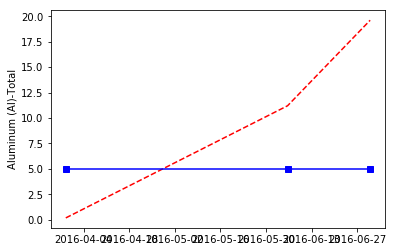

In [29]:
plt.plot_date(analyte_data[0], analyte_data[1], 'r--')
plt.plot_date(guideline_data[0], guideline_data[1], 'bs-')

plt.ylabel("Aluminum (Al)-Total")
plt.show()